# $$Text ~Analytics: Análise~de~ Sentimentos~no~Mercado~Financeiro$$

### $$Conceito:$$

**A análise de texto é o processo automatizado de tradução de grandes volumes de texto não estruturado em dados quantitativos para descobrir insights, tendências e padrões. Combinada com ferramentas de visualização de dados, essa técnica permite que as empresas entendam a história por trás dos números e tomem melhores decisões**

## $$Qual ~é ~a~ diferença~ entre~ mineração~ de~ texto~ e~ análise ~de~ texto$$


**A mineração de texto e a análise de texto são frequentemente usadas de forma intercambiável. O termo mineração de texto geralmente é usado para obter insights qualitativos de texto não estruturado, enquanto a análise de texto fornece resultados quantitativos**

- **Mineração de texto =** Pode ser usada para identificar se os clientes estão satisfeitos com um produto analisando suas avaliações e pesquisas


- **Análise de texto =** É usada para insights mais profundos, como identificar um padrão ou tendência do texto não estruturado, os resultados da análise de texto podem ser usados com técnicas de visualização de dados para uma compreensão mais fácil e rápida tomada de decisão


## $$Benefícios~da~análise~de~texto$$


- Ajude as empresas a entender as tendências dos clientes, o desempenho do produto e a qualidade do serviço. Isso resulta em tomada de decisão rápida, melhorando inteligência de negócios, aumento da produtividade e economia de custos.


- Ajuda os pesquisadores a explorar uma grande quantidade de literatura pré-existente em um curto espaço de tempo, extraindo o que é relevante para seu estudo. Isso ajuda em avanços científicos mais rápidos.


- Auxilia na compreensão de tendências e opiniões gerais da sociedade, que possibilitam governos e órgãos políticos na tomada de decisões.


- As técnicas de análise de texto ajudam os mecanismos de pesquisa e os sistemas de recuperação de informações a melhorar seu desempenho, proporcionando experiências rápidas ao usuário.


- Refine os sistemas de recomendação de conteúdo do usuário categorizando o conteúdo relacionado.


## $$Técnicas ~de~ análise~ de ~texto~ e ~casos~ de~ uso$$

**Existem várias técnicas relacionadas à análise do texto não estruturado. Cada uma dessas técnicas é usada para diferentes cenários de caso de uso**


#### **1 - Análise de sentimentos:**

- A análise de sentimentos é usada para identificar as emoções transmitidas pelo texto não estruturado



#### **2 - Modelagem de tópicos:**

- A modelagem de tópicos identifica as palavras-chave usadas no texto para identificar o assunto do artigo


#### **3 - Reconhecimento de Entidade Nomeada (NER):**

- NER é uma técnica de análise de texto usada para identificar entidades nomeadas como pessoas, lugares, organizações e eventos em texto não estruturado. NER extrai substantivos do texto e determina os valores desses substantivos


#### **4 - Frequência do prazo - frequência inversa do documento(TF-IDF):**

- O TF-IDF é usado para determinar a frequência com que um termo aparece em um texto ou grupo de documentos, é a importância desse termo para o documento

#### **5 - Extração de evento:**

- Esta é uma técnica de análise de texto que é um avanço em relação à extração de entidade nomeada, os algoritmos avançados se esforçam para reconhecer não apenas os eventos, mas também o local, os participantes, a data e a hora, sempre que aplicável



__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Analisar~o~mercado~financeiro~por~meio~da~análise~de~sentimento~nas~mídias~sociais$$

In [1]:
#Carregar os pacotes
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
import xgboost
import lightgbm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob, Word, Blobber
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from pandas_datareader.data import DataReader
from datetime import datetime

# Base de Dados 

In [2]:
# Carregando o dataset de texto de notícias
columns = ['Date', 'Category', 'News']
df_texto = pd.read_csv("dados/news.csv", names = columns)
df_texto

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


**Dataset contém 3.424.068 registros e 3 variáveis.**

**Precisamos fazer ajustes no dataframe, temos registros, colunas e caracteres que são irrelevantes para interpretação das notícias**

# Dicionário de Dados

### **$$Variáveis:$$**

- **Date:** Data que foi publicado a noticia


- **Category:** Categoria da noticia
    
    
- **News:** Texto sobre a noticia

# Análise Exploratória

In [3]:
# Tipos de dados das colunas
df_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424068 entries, 0 to 3424067
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      object
 1   Category  object
 2   News      object
dtypes: object(3)
memory usage: 78.4+ MB


In [4]:
# Remover a primeira linha pois é o cabeçalho do arquivo
df_texto.drop(0, inplace = True)

In [5]:
# Remover a coluna categoria pois não precisamos dela para nossa análise
df_texto.drop('Category', axis = 1, inplace = True)

In [6]:
# Visualizando o dataset
df_texto

,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3424063,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,Govt extends deadline for use of FASTag till F...


**Com pequenos ajustes deixamos nosso dataframe mais claro para fazer as analises**

In [7]:
# Transforamar a coluna de data Str em Datetime
df_texto["Date"] = pd.to_datetime(df_texto["Date"], format = '%Y%m%d')
df_texto["Date"].head()

1   2001-01-02
2   2001-01-02
3   2001-01-02
4   2001-01-02
5   2001-01-02
Name: Date, dtype: datetime64[ns]

**Transformamos a coluna 'data' no formato 'datetime64' para conseguir fazer as analises usando as datas**

In [8]:
#Textos em seu formato bruto
df_texto.News[0:6]

1    Status quo will not be disturbed at Ayodhya; s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India?
4                   For bigwigs; it is destination Goa
5                 Extra buses to clear tourist traffic
6          Dilute the power of transfers; says Riberio
Name: News, dtype: object

**Tratar os textos para que fique mais fácil do algoritimo interpretar cada sentimento de cada frase**

In [9]:
# Remover os caracteres que não sejam letras
df_texto.replace("[^a-zA-Z']", " ", regex = True, inplace = True)

#Textos tratados
df_texto.News[0:6]

1    Status quo will not be disturbed at Ayodhya  s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India 
4                   For bigwigs  it is destination Goa
5                 Extra buses to clear tourist traffic
6          Dilute the power of transfers  says Riberio
Name: News, dtype: object

**Agora o texto só contém letras, foi removido os números e caracteres especiais**

In [10]:
# Agrupar as notícias por dia
df_texto['News'] = df_texto.groupby(['Date']).transform(lambda x : ' '.join(x))

#Remover duplicatas
df_texto = df_texto.drop_duplicates() 

#Reset do índice
df_texto.reset_index(inplace = True, drop = True)
df_texto

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...
7258,2020-12-28,Horoscope Today December Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings December Predicti...


**Agrupamos todas as notícias por data**

In [11]:
# Vamos checar se temos valores ausentes
df_texto.isnull().sum()

Date    0
News    0
dtype: int64

In [12]:
# Shape do dataframe
df_texto.shape

(7262, 2)

**Dataframe com 7.262 Registros e 2 colunas**

# Carregar dados das cotações de ações 

In [13]:
# Dataset de cotação de ações
df_numerico = pd.read_csv("dados/BSESN.csv")
df_numerico

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,6626.490234,6684.220215,6626.490234,6679.200195,6679.200195,12000.0
1,2005-01-04,6683.560059,6696.310059,6640.899902,6651.009766,6651.009766,16600.0
2,2005-01-05,6628.890137,6629.979980,6337.609863,6458.839844,6458.839844,24000.0
3,2005-01-06,6447.270020,6481.229980,6325.359863,6367.390137,6367.390137,22200.0
4,2005-01-07,6374.189941,6440.169922,6348.750000,6420.459961,6420.459961,17800.0
...,...,...,...,...,...,...,...
3677,2019-11-25,40439.660156,40931.710938,40393.898438,40889.230469,40889.230469,28600.0
3678,2019-11-26,41022.851563,41120.281250,40710.199219,40821.300781,40821.300781,32800.0
3679,2019-11-27,40979.390625,41075.761719,40848.699219,41020.609375,41020.609375,32400.0
3680,2019-11-28,41161.539063,41163.789063,40996.078125,41130.171875,41130.171875,30900.0


**Dataset contém 3.682 registros e 7 variáveis.**

# Dicionário de Dados



### **$$Variáveis:$$**

- **Date:** Data que foi registrado os valores das ações 


- **Open:** Valor da ação na abertura do pregão 
    
    
- **High:** Valor mais alto que a ação chegou no dia


- **Low:**  Valor mais baixo que a ação chegou no dia


- **Close:**  Valor que a ação estava no fechamento do mercado


- **Adj Close:** Ajuste no valor da ação após o fechamento do mercado


- **Volume:** Volume de ações negociadas no dia

# Análise Exploratória  

In [14]:
# Tipos de dados das colunas
tipo = df_numerico.dtypes
tipo = tipo.to_frame()
tipo.columns = ['Type']

# Verifica o total de valores únicos por coluna
tipo['Unique']= df_numerico.nunique()
tipo

,Type,Unique
Date,object,3682
Open,float64,3648
High,float64,3653
Low,float64,3651
Close,float64,3654
Adj Close,float64,3654
Volume,float64,433


**A variável 'Date' precisa ser transformada no type Datetime**

In [15]:
# Transformar a coluna de data object em Datetime
df_numerico["Date"] = pd.to_datetime(df_numerico["Date"])

# Info do dataset
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3682 non-null   datetime64[ns]
 1   Open       3655 non-null   float64       
 2   High       3655 non-null   float64       
 3   Low        3655 non-null   float64       
 4   Close      3655 non-null   float64       
 5   Adj Close  3655 non-null   float64       
 6   Volume     3655 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 201.5 KB


**Transformamos a coluna 'Date' em 'datetime', para juntar os 2 dataframes pela coluna 'Date'** 

In [16]:
# Resumo estatístico
df_numerico.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3.655000e+03
mean,21146.347264,21269.132682,20984.649405,21124.125256,21124.125256,1.037558e+05
std,8749.525123,8759.377962,8716.504502,8733.757649,8733.757649,1.237143e+06
min,6093.660156,6174.000000,6069.330078,6102.740234,6102.740234,8.000000e+02
25%,15181.980469,15328.830078,15007.475098,15149.320312,15149.320312,1.060000e+04
50%,19072.019531,19201.919922,18864.810547,19016.460938,19016.460938,1.420000e+04
75%,27634.455078,27772.924805,27438.979493,27579.464844,27579.464844,2.000000e+04
max,41161.539063,41163.789063,40996.078125,41130.171875,41130.171875,3.181510e+07


**Não temos diferença nas medias das variáveis**

In [17]:
# Valores Nulos
df_numerico.isnull().sum()

Date          0
Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

In [18]:
# Drop dos valores Nulos
df_numerico.dropna(inplace = True)

df_numerico.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Dataset sem valores nulos**

# Engenharia de atributos

- Vamos criar a variável de retorno do investimento por dia, usando as variáveis 'Open' e 'Close' fazendo a diferença entre elas

- Para criar a variável target através das cotações, precisamos transformar algumas variáveis no dataframe

In [19]:
#Selecionar as variáveis relevante para a análise
retor = df_numerico[['Date','Open','Close']]
retor 

,Date,Open,Close
0,2005-01-03,6626.490234,6679.200195
1,2005-01-04,6683.560059,6651.009766
2,2005-01-05,6628.890137,6458.839844
3,2005-01-06,6447.270020,6367.390137
4,2005-01-07,6374.189941,6420.459961
...,...,...,...
3677,2019-11-25,40439.660156,40889.230469
3678,2019-11-26,41022.851563,40821.300781
3679,2019-11-27,40979.390625,41020.609375
3680,2019-11-28,41161.539063,41130.171875


**Selecionamos as variáveis: 'Date','Open' e 'Close'**

In [20]:
# Calculo do retornos financeiro
retor['Retorno_diario']= ((retor.Close/retor.Open)-1)*100
retor

,Date,Open,Close,Retorno_diario
0,2005-01-03,6626.490234,6679.200195,0.795443
1,2005-01-04,6683.560059,6651.009766,-0.487020
2,2005-01-05,6628.890137,6458.839844,-2.565291
3,2005-01-06,6447.270020,6367.390137,-1.238972
4,2005-01-07,6374.189941,6420.459961,0.725896
...,...,...,...,...
3677,2019-11-25,40439.660156,40889.230469,1.111706
3678,2019-11-26,41022.851563,40821.300781,-0.491313
3679,2019-11-27,40979.390625,41020.609375,0.100584
3680,2019-11-28,41161.539063,41130.171875,-0.076205


**Variável 'Retorno_diario', porcentagem de ganho ou perda no dia, comprando na abertura e vendendo no fechamento do dia**

In [22]:
#Criar a variável Target
retor['Classe'] = np.where((retor['Retorno_diario']>0),1, 0)
retor

,Date,Open,Close,Retorno_diario,Classe
0,2005-01-03,6626.490234,6679.200195,0.795443,1
1,2005-01-04,6683.560059,6651.009766,-0.487020,0
2,2005-01-05,6628.890137,6458.839844,-2.565291,0
3,2005-01-06,6447.270020,6367.390137,-1.238972,0
4,2005-01-07,6374.189941,6420.459961,0.725896,1
...,...,...,...,...,...
3677,2019-11-25,40439.660156,40889.230469,1.111706,1
3678,2019-11-26,41022.851563,40821.300781,-0.491313,0
3679,2019-11-27,40979.390625,41020.609375,0.100584,1
3680,2019-11-28,41161.539063,41130.171875,-0.076205,0


**Para criar a variável target usamos 2 classes: 'Classe = 0' retorno negativo < 0 e a 'Classe = 1'  retorno positivo > 0, não considerando impostos e corretagem**

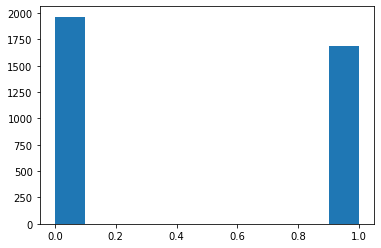

In [24]:
#Plot da variável Target
plt.hist(retor.Classe);

In [25]:
a = len(retor[retor.Classe==0])
b = len(retor[retor.Classe==1])
total = len(retor)

print(f'Retorno Negativo: {round(a/total*100,2)}%')
print(f'Retorno Positivo: {round(b/total*100,2)}%')

Retorno Negativo: 53.79%
Retorno Positivo: 46.21%


**As 2 classes estão balanceadas**

In [27]:
#Retorno Positivo
a = retor[retor['Retorno_diario']>0]
a.Retorno_diario.sum()

1374.0479773941822

In [28]:
#Retorno Negativo
b = retor[retor['Retorno_diario']<0]
b.Retorno_diario.sum()

-1679.8018396744515

In [23]:
#Retorno ao longo dos meses
retor['Retorno_diario'].cumsum().to_frame()

,Retorno_diario
0,0.795443
1,0.308423
2,-2.256868
3,-3.495840
4,-2.769943
...,...
3677,-304.449622
3678,-304.940935
3679,-304.840351
3680,-304.916556


**Note que apesar do equilibrio entre as 2 classes, o acumulado durante os anos fica em -305%, vamos tentar diminuir essa diferença usando analise textual**

In [30]:
#Fitrar os dados < -1 e > 1
menor = retor[(retor.Retorno_diario<-1)]
maior = retor[(retor.Retorno_diario>1)]
filtro_1 = pd.concat([menor,maior])
filtro_1

,Date,Open,Close,Retorno_diario,Classe
2,2005-01-05,6628.890137,6458.839844,-2.565291,0
3,2005-01-06,6447.270020,6367.390137,-1.238972,0
5,2005-01-10,6440.330078,6308.540039,-2.046324,0
6,2005-01-11,6317.390137,6222.870117,-1.496188,0
7,2005-01-12,6250.350098,6102.740234,-2.361626,0
...,...,...,...,...,...
3635,2019-09-20,36214.921875,38014.621094,4.969496,1
3646,2019-10-09,37628.050781,38177.949219,1.461406,1
3652,2019-10-17,38647.441406,39052.058594,1.046944,1
3659,2019-10-29,39293.488281,39831.839844,1.370078,1


**Filtramos somente os retornos > 1% ou < -1%, com isso conseguimos verificar o impacto das notícias em relação as cotações de forma mais enfática**

## Análise Textual


In [31]:
# Função para obter subjetividade
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

**Função para calcular a subjetividade do texto, dando pontuações próximas de 0 (negativa) e próximas de 1 (positiva)**

In [32]:
# Função para obter polaridade
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

**Função para calcula a Polaridade(Tendencia mais positiva ou negativa) do texto**

In [33]:
# Criar as variáveis Subjectivity e Polarity
df_texto['Subjectivity'] = df_texto['News'].apply(getSubjectivity)
df_texto['Polarity'] = df_texto['News'].apply(getPolarity)

df_texto

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...,0.392082,0.042978
7258,2020-12-28,Horoscope Today December Check astro...,0.409973,0.071405
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.415684,0.060775
7260,2020-12-30,Numerology Readings December Predicti...,0.436863,0.046930


**Criamos 2 variáveis de sentimentos: Subjectivity e Polarity**

In [34]:
%%time
# Criando um analisador de sentimento
analisador = SentimentIntensityAnalyzer()

#Criando os sentimentos extraido dos textos
df_texto['Compound'] = [analisador.polarity_scores(v)['compound'] for v in df_texto['News']]
df_texto['Negative'] = [analisador.polarity_scores(v)['neg'] for v in df_texto['News']]
df_texto['Neutral']  = [analisador.polarity_scores(v)['neu'] for v in df_texto['News']]
df_texto['Positive'] = [analisador.polarity_scores(v)['pos'] for v in df_texto['News']]

# Visualizar o resultado
df_texto.head()

CPU times: total: 45min 10s
Wall time: 46min 49s


,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131


**Além das variáveis de Subjetividade e Polaridade, criamos mais 4 variáveis de análise de sentimentos: 'Negative' = Texto com conotação negativa, 'Positive' = Conotação positiva, 'Neutral' = Textos neutros e 'Compound' = Scores dado a junção das outras 3 variáveis**

In [67]:
#Analise descritiva dos dados 
df_texto.describe()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
count,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000
mean,0.402244,0.069796,-0.894801,0.153573,0.742588,0.103849
std,0.037109,0.037357,0.408166,0.026748,0.034713,0.022078
min,0.000000,-0.233333,-1.000000,0.000000,0.000000,0.000000
25%,0.384137,0.049041,-0.999900,0.138000,0.723000,0.092000
50%,0.401477,0.068362,-0.999600,0.155000,0.740000,0.103000
75%,0.419616,0.088798,-0.997500,0.170000,0.761000,0.115000
max,1.000000,0.666667,1.000000,0.444000,1.000000,0.608000


**Note que a maioria dos dados tiveram uma pontuação maior na variavel 'Neutral', isso pode ser um problema na hora da predição**

## Merge dos Dados (Classe do Retorno Financeiro e das polaridades do texto)

In [299]:
#Selecionar as variáveis relevantes do dataset das cotações financeiras
retorno1  = filtro_1[['Date','Classe','Retorno_diario']]

#Selecionar as variáveis relevantes do dataset textual
retorno2 = df_texto[['Date','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]

#Merge
dados_completos = pd.merge(retorno1,retorno2,on = 'Date')

#Ordenar por Data
dados_completos = dados_completos.sort_values(by='Date')
dados_completos

,Date,Classe,Retorno_diario,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2005-01-05,0,-2.565291,0.422979,0.084374,-0.9947,0.149,0.749,0.103
1,2005-01-06,0,-1.238972,0.329153,0.169928,0.0262,0.101,0.799,0.101
2,2005-01-10,0,-2.046324,0.390789,0.175591,0.9757,0.108,0.747,0.146
3,2005-01-11,0,-1.496188,0.416421,0.089603,-0.9896,0.152,0.721,0.127
4,2005-01-12,0,-2.361626,0.370177,0.061235,-0.9694,0.130,0.761,0.109
...,...,...,...,...,...,...,...,...,...
562,2019-10-04,0,-1.896228,0.404196,0.091570,-0.9999,0.159,0.745,0.096
1039,2019-10-09,1,1.461406,0.426521,0.082447,-0.9999,0.161,0.743,0.095
1040,2019-10-17,1,1.046944,0.411840,0.061206,-0.9998,0.145,0.757,0.099
1041,2019-10-29,1,1.370078,0.449153,0.056285,-0.9994,0.150,0.722,0.128


**Selecionamos apenas as variáveis relevantes para a predição, note que através dos textos conseguimos criar as variáveis exógenas, portanto os textos não são mais relevantes**

# Análise Exploratória 

- Fazer a análise exploratória do novo dataset, e verificar as variáveis relevantes para predição

## Variável Target:

### Classe

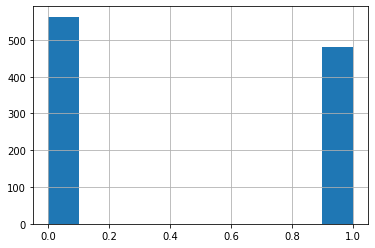

In [300]:
#Plot
dados_completos.Classe.hist();

In [301]:
a = len(dados_completos[dados_completos.Classe==0])
b = len(dados_completos[dados_completos.Classe==1])
total = len(dados_completos)

print(f'Classe 0: {round(a/total*100,2)}%')
print(f'Classe 1: {round(b/total*100,2)}%')


Classe 0: 53.98%
Classe 1: 46.02%


**Dados equilibrados na variável target**

## Variáveis Preditoras:

### Subjectivity

In [302]:
#classe 0
classe_0 = dados_completos.loc[(dados_completos['Classe']==0)]
a = classe_0['Subjectivity'].median()

#Classe 1
classe_1 = dados_completos.loc[(dados_completos['Classe']==1)]
b = classe_1['Subjectivity'].median()

print(f'Classe 0 = {round(a,4)}')
print(f'Classe 1 = {round(b,4)}')

Classe 0 = 0.4018
Classe 1 = 0.4026


### Polarity

In [303]:
#classe 0
#classe 0
classe_0 = dados_completos.loc[(dados_completos['Classe']==0)]
a = classe_0['Polarity'].median()

#Classe 1
classe_1 = dados_completos.loc[(dados_completos['Classe']==1)]
b = classe_1['Polarity'].median()

print(f'Classe 0 = {round(a,4)}')
print(f'Classe 1 = {round(b,4)}')

Classe 0 = 0.0689
Classe 1 = 0.0706


### Compound

In [304]:
#classe 0
classe_0 = dados_completos.loc[(dados_completos['Classe']==0)]
a = classe_0['Compound'].median()

#Classe 1
classe_1 = dados_completos.loc[(dados_completos['Classe']==1)]
b = classe_1['Compound'].median()

print(f'Classe 0 = {round(a,4)}')
print(f'Classe 1 = {round(b,4)}')

Classe 0 = -0.9997
Classe 1 = -0.9996


### Negative

In [305]:
#classe 0
classe_0 = dados_completos.loc[(dados_completos['Classe']==0)]
a = classe_0['Negative'].median()

#Classe 1
classe_1 = dados_completos.loc[(dados_completos['Classe']==1)]
b = classe_1['Negative'].median()

print(f'Classe 0 = {round(a,4)}')
print(f'Classe 1 = {round(b,4)}')

Classe 0 = 0.159
Classe 1 = 0.159


### Neutral

In [306]:
#classe 0
classe_0 = dados_completos.loc[(dados_completos['Classe']==0)]
a = classe_0['Neutral'].median()

#Classe 1
classe_1 = dados_completos.loc[(dados_completos['Classe']==1)]
b = classe_1['Neutral'].median()

print(f'Classe 0 = {round(a,4)}')
print(f'Classe 1 = {round(b,4)}')

Classe 0 = 0.736
Classe 1 = 0.736


### Positive

In [307]:
#classe 0
classe_0 = dados_completos.loc[(dados_completos['Classe']==0)]
a = classe_0['Positive'].median()

#Classe 1
classe_1 = dados_completos.loc[(dados_completos['Classe']==1)]
b = classe_1['Positive'].median()

print(f'Classe 0 = {round(a,4)}')
print(f'Classe 1 = {round(b,4)}')

Classe 0 = 0.103
Classe 1 = 0.105


**Note que nenhuma das variáveis aparenta ter diferença significativa na mediana em relação a variável target**

**Vamos selecionar todas as variáveis analisadas para modelagem preditiva**

# Modelagem

## Dividir os dados em treino e teste

In [308]:
#Separar os dados em x e y
x = dados_completos.drop(['Retorno_diario','Classe','Date'],axis=1)
y = dados_completos.Classe

#Separar as variaveis em treino e teste
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x,y,test_size=0.3,random_state=1)

# Modelo 1 - Random Forest

In [309]:
#Criar modelo 1
from sklearn.ensemble import RandomForestClassifier

# Construção do Classificador
random_forest1 = RandomForestClassifier() 

#Treinar o modelo com os dados de treino
modelo_random1 =  random_forest1.fit(X_treino, Y_treino)


#Previsões com o modelo de teste
previsoes_v1 = modelo_random1.predict(X_teste)

# Dicionário de métricas e metadados
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
rf1 = {'Acurácia_Treino':modelo_random.score(X_treino,Y_treino),
               'Acurácia_Teste':accuracy_score(Y_teste, previsoes_v1),
               'Precision_Teste':precision_score(Y_teste, previsoes_v1),
               'Recall_Teste':recall_score(Y_teste, previsoes_v1),
               'AUC_Teste':roc_auc_score(Y_teste, previsoes_v1)}
# Print

metricas = pd.DataFrame(rf1.items(),columns=[['Metricas','RF1']]);metricas

,Metricas,RF1
0,Acurácia_Treino,0.561644
1,Acurácia_Teste,0.476038
2,Precision_Teste,0.491071
3,Recall_Teste,0.339506
4,AUC_Teste,0.481011


<AxesSubplot:>

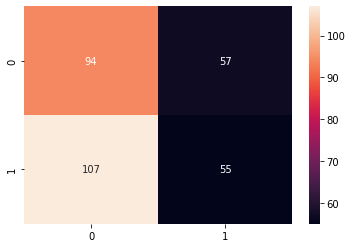

In [310]:
#Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste, previsoes_v1)
sns.heatmap(cm,annot=True,fmt='d')

**O Algoritimo Random Forest teve um bom desempenho com os dados de treino, porém com os dados de teste não obteve o mesmo resultado**

# Modelo 2 - Redes Neurais

In [311]:
#Criar modelo 2
from sklearn.neural_network import MLPClassifier

rede_neural_1 = MLPClassifier(max_iter=1500, verbose=False,
                                   solver = 'adam', activation = 'relu',n_iter_no_change=40,learning_rate_init=0.0001,
                                   hidden_layer_sizes = (100,100))
rede_neural_1.fit(X_treino, Y_treino)

#Previsões com o modelo de teste
previsoes_v2 = rede_neural_1.predict(X_teste)

# Dicionário de métricas e metadados
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
rn1 = {'Acurácia_Treino':rede_neural_credit1.score(X_treino,Y_treino),
               'Acurácia_Teste':accuracy_score(Y_teste, previsoes_v2),
               'Precision_Teste':precision_score(Y_teste, previsoes_v2),
               'Recall_Teste':recall_score(Y_teste, previsoes_v2),
               'AUC_Teste':roc_auc_score(Y_teste, previsoes_v2)}
# Print

metricas['RN1'] = rn1.values()
metricas

,Metricas,RF1,RN1
0,Acurácia_Treino,0.561644,0.565753
1,Acurácia_Teste,0.476038,0.479233
2,Precision_Teste,0.491071,0.400000
3,Recall_Teste,0.339506,0.012346
4,AUC_Teste,0.481011,0.496239


<AxesSubplot:>

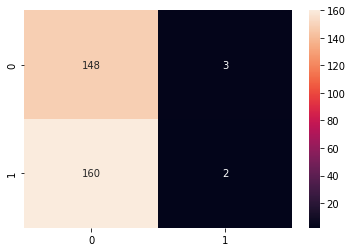

In [312]:
#Matriz de Confusão
cm = confusion_matrix(Y_teste, previsoes_v2)
sns.heatmap(cm,annot=True,fmt='d')

**O modelo de Redes Neurais teve um pouco mais de equilíbrio entre os dados de treino e teste, apesar de ter um resultado bem parecido com o modelo de Random Forest**

# Padronizar os dados

In [313]:
#Padronização
from sklearn.preprocessing import StandardScaler
dados_norm = StandardScaler().fit(x)
dados_norm = pd.DataFrame(dados_norm.transform(x),columns=x.columns)
dados_norm

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.703115,0.442758,-0.212687,-0.384482,0.409704,-0.102110
1,-2.470553,3.067442,2.500621,-2.369498,2.114216,-0.219789
2,-0.385721,3.241176,5.024165,-2.080017,0.341523,2.428008
3,0.481292,0.603203,-0.199133,-0.260418,-0.544823,1.310049
4,-1.082923,-0.267096,-0.145446,-1.170218,0.818787,0.250930
...,...,...,...,...,...,...
1038,0.067787,0.663526,-0.226507,0.029063,0.273343,-0.513989
1039,0.822922,0.383657,-0.226507,0.111772,0.205162,-0.572829
1040,0.326336,-0.267986,-0.226242,-0.549900,0.682426,-0.337469
1041,1.588458,-0.418945,-0.225179,-0.343127,-0.510733,1.368889


In [314]:
#Separar as variaveis em treino e teste
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(dados_norm,y,test_size=0.3,random_state=1)

**Como os dados estavam em escalas diferentes, padronizamos para ver se melhora o resultado dos modelos**

# Modelo 3 - Random Forest

In [315]:
#Criar modelo 3

# Construção do Classificador
random_forest2 = RandomForestClassifier() 

#Treinar o modelo com os dados de treino
modelo_random2 =  random_forest2.fit(X_treino, Y_treino)


#Previsões com o modelo de teste
previsoes_v3 = modelo_random2.predict(X_teste)

# Dicionário de métricas e metadados
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
rf1 = {'Acurácia_Treino':modelo_random.score(X_treino,Y_treino),
               'Acurácia_Teste':accuracy_score(Y_teste, previsoes_v3),
               'Precision_Teste':precision_score(Y_teste, previsoes_v3),
               'Recall_Teste':recall_score(Y_teste, previsoes_v3),
               'AUC_Teste':roc_auc_score(Y_teste, previsoes_v3)}
# Print

metricas['RF_Padro'] = rf2.values()
metricas

,Metricas,RF1,RN1,RF_Padro
0,Acurácia_Treino,0.561644,0.565753,1.000000
1,Acurácia_Teste,0.476038,0.479233,0.485623
2,Precision_Teste,0.491071,0.400000,0.296296
3,Recall_Teste,0.339506,0.012346,0.505263
4,AUC_Teste,0.481011,0.496239,0.492519


<AxesSubplot:>

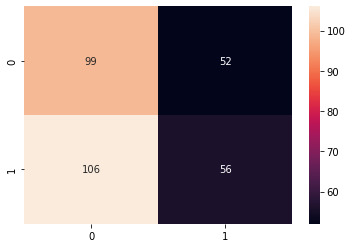

In [316]:
#Matriz de Confusão
cm = confusion_matrix(Y_teste, previsoes_v3)
sns.heatmap(cm,annot=True,fmt='d')

**Mesmo com a padronização, continuamos com o mesmo problema nos resultado dos dados de treino e teste**

# Modelo 4 - Redes Neurais

In [317]:
#Criar modelo 4

rede_neural_credit1 = MLPClassifier(max_iter=1500, verbose=False,
                                   solver = 'adam', activation = 'relu',n_iter_no_change=40,learning_rate_init=0.0001,
                                   hidden_layer_sizes = (100,100))
rede_neural_credit1.fit(X_treino, Y_treino)

#Previsões com o modelo de teste
previsoes_v4 = rede_neural_credit1.predict(X_teste)

# Dicionário de métricas e metadados
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
rf1 = {'Acurácia_Treino':modelo_random.score(X_treino,Y_treino),
               'Acurácia_Teste':accuracy_score(Y_teste, previsoes_v4),
               'Precision_Teste':precision_score(Y_teste, previsoes_v4),
               'Recall_Teste':recall_score(Y_teste, previsoes_v4),
               'AUC_Teste':roc_auc_score(Y_teste, previsoes_v4)}
# Print

metricas['RN_Padro'] = rn2.values()
metricas

,Metricas,RF1,RN1,RF_Padro,RN_Padro
0,Acurácia_Treino,0.561644,0.565753,1.000000,0.749315
1,Acurácia_Teste,0.476038,0.479233,0.485623,0.479233
2,Precision_Teste,0.491071,0.400000,0.296296,0.327160
3,Recall_Teste,0.339506,0.012346,0.505263,0.495327
4,AUC_Teste,0.481011,0.496239,0.492519,0.484772


<AxesSubplot:>

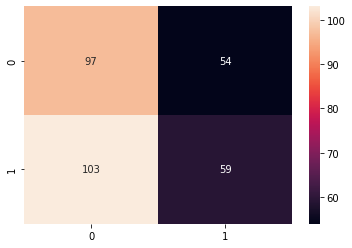

In [318]:
#Matriz de Confusão
cm = confusion_matrix(Y_teste, previsoes_v4)
sns.heatmap(cm,annot=True,fmt='d')

**O mesmo acontece com o modelo de Redes Neurais, teve pouca mudança em comparação com os outros modelos**

## Previsão

In [320]:
#Criar as Previsão
dados_completos['Previsao'] = modelo_random1.predict(x)
dados_completos

,Date,Classe,Retorno_diario,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Previsao
0,2005-01-05,0,-2.565291,0.422979,0.084374,-0.9947,0.149,0.749,0.103,0
1,2005-01-06,0,-1.238972,0.329153,0.169928,0.0262,0.101,0.799,0.101,0
2,2005-01-10,0,-2.046324,0.390789,0.175591,0.9757,0.108,0.747,0.146,0
3,2005-01-11,0,-1.496188,0.416421,0.089603,-0.9896,0.152,0.721,0.127,1
4,2005-01-12,0,-2.361626,0.370177,0.061235,-0.9694,0.130,0.761,0.109,0
...,...,...,...,...,...,...,...,...,...,...
562,2019-10-04,0,-1.896228,0.404196,0.091570,-0.9999,0.159,0.745,0.096,0
1039,2019-10-09,1,1.461406,0.426521,0.082447,-0.9999,0.161,0.743,0.095,1
1040,2019-10-17,1,1.046944,0.411840,0.061206,-0.9998,0.145,0.757,0.099,1
1041,2019-10-29,1,1.370078,0.449153,0.056285,-0.9994,0.150,0.722,0.128,1


**Como todos os modelos ficaram bem próximos em seus resultados, escolhemos aleatoriamente o modelo 1 - Random Forest para fazer a previsão dos dados**

In [329]:
#Lucro da previsão

#Previsão de alta
retor_Previsao = dados_completos[dados_completos.Previsao==1] 
retor_Previsao = retor_Previsao.Retorno_diario.cumsum()
retor_Previsao = retor_Previsao.to_frame()[-1:]
retor_Previsao.columns = ['Retorno_alta']

#Previsão de Baixa
retor_Previsao1 = dados_completos[dados_completos.Previsao==0] 
retor_Previsao1 = retor_Previsao1.Retorno_diario*-1
retor_Previsao1 = retor_Previsao1.cumsum()
retor_Previsao1 = retor_Previsao1.to_frame()[-1:]
retor_Previsao['Retorno_baixa'] = retor_Previsao1.values
retor_Previsao['Lucro'] = retor_Previsao.Retorno_alta + retor_Previsao.Retorno_baixa
round(retor_Previsao,2)

,Retorno_alta,Retorno_baixa,Lucro
1042,565.64,773.1,1338.74


**O retorno do investimento seguindo a previsão foi de 1338%, seguindo o criterio de investir na queda do ativo quando a previsão for 0, e investir na alta quando a previsão for 1**

In [328]:
#Investimento de maneira Aleatoria
a = []
w = []
q = []
for i in range(0,1000):
    #Gerar numeros aleatorios
    dados_completos['Aleatorio'] = np.random.randint(2, size=1043)
    
    #Previsão de alta
    retor_aleat = dados_completos[dados_completos.Aleatorio==1] 
    retor_aleat = retor_aleat.Retorno_diario.cumsum()
    retor_aleat = retor_aleat.to_frame()[-1:]
    retor_aleat.columns = ['Retorno_alta']
    
    #Previsão de Baixa
    retor_aleat1 = dados_completos[dados_completos.Aleatorio==0] 
    retor_aleat1 = retor_aleat1.Retorno_diario*-1
    retor_aleat1 = retor_aleat1.cumsum()
    retor_aleat1 = retor_aleat1.to_frame()[-1:]
    retor_aleat['Retorno_baixa'] = retor_aleat1.values
    retor_aleat['Lucro'] = retor_aleat.Retorno_alta + retor_aleat.Retorno_baixa
    
    #Criar dataframe dos resultado e fazer a média 
    b = round(retor_aleat.Lucro,2)
    r = round(retor_aleat.Retorno_alta,2)
    f = round(retor_aleat.Retorno_baixa,2)
    a.append(b.values)
    w.append(r.values)
    q.append(f.values)
lucro_aleat = pd.DataFrame(a,columns=['Lucro']).mean().to_frame().T
lucro_aleat1 = pd.DataFrame(r,columns=['Retorno_alta']).mean().to_frame().T
lucro_aleat2 = pd.DataFrame(f,columns=['Retorno_baixa']).mean().to_frame().T

luc = lucro_aleat1.join(lucro_aleat2)
round(luc.join(lucro_aleat),2)

,Retorno_alta,Retorno_baixa,Lucro
0,-102.41,105.06,2.65


**Observe que fizemos 1000 repetições de aplicação de maneiras diferentes, e a média do retorno fica praticamente no 0, isso comprova que nosso modelo tem significancia no seu resultado comparado a um investimento feito de maneira aleatoria**

# Conclusão:

**Analisar o mercado financeiro por meio de textos, aplicando análise de sentimento é uma maneira diferente de investir, porém juntando as 2 técnicas: Análise de Texto e análise das cotações, pode ser uma excelente maneira de obter lucros**
 
**Primeiramente fizemos analise exploratória dos dados de texto, removemos alguns caracteres irrelevantes para facilitar na análise textual, com os dados das ações criamos uma coluna de retorno diário para facilitar o entendimento do impacto da notícia com o preço das ações**

**Feito a analise textual, criamos várias vereáveis exógenas com intuito de verificar o sentimento de cada texto dando uma polaridade para cada frase, depois juntamos as 2 tabelas (ações e texto) através das datas**

**Na análise exploratória dos novos dados não conseguimos tirar nenhum insight, pois a mediana das variáveis não era significante entre as classes da variável target, portanto selecionamos todas as variáveis para modelagem**

**Na modelagem usamos apenas 2 algoritimos, Random Forest e Redes Neurais, não fizemos nenhum tipo de otimização, usamos apenas o padrão de cada algoritimo**

**Por fim usamos a previsão do algoritimo de Random Forest, que obteve o melhor acuracia nos dados de teste e comparamos o resultado do investimento com investimento feito de maneira aleatória, conseguimos um excelente resultado com esses dados**

**Portanto podemos concluir que analisar o mercado financeiro por meio da análise de sentimento nas mídias sociais é possível sim, tendo os dados textuais bem tratados e ações que seguem o padrão das notícias, conseguimos chegar a ótimos resultados no longo prazo.**



**OBS: Se tratando de dados de investimento, não é comum obter excelentes resultados nos dados de teste, o importante é verificar o retorno do investimento a longo prazo**